# Applying transfer learning

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Load the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the dataset information
print(f"Training samples: {x_train.shape[0]}, Validation samples: {x_val.shape[0]}, Test samples: {x_test.shape[0]}")

Training samples: 40000, Validation samples: 10000, Test samples: 10000


## Examine a pretrained model

In [4]:
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Display model architecture
base_model.summary()

C:\Users\messa\AppData\Local\Temp\ipykernel_1316\1565985136.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [5]:
# Inspect layers and find the first layer with weights
layer_with_weights = None
for layer in base_model.layers:
    if layer.get_weights():
        layer_with_weights = layer
        break

In [7]:
layer_with_weights

<Conv2D name=Conv1, built=True>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47017857..0.6915975].


First layer with weights: Conv1


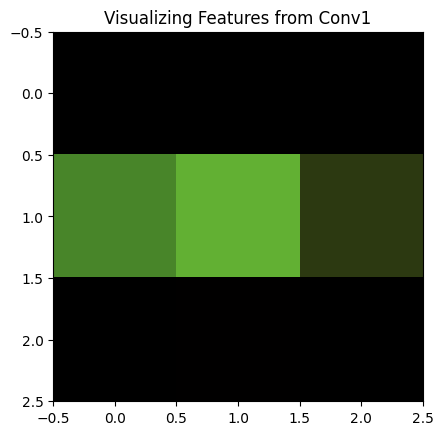

In [11]:
if layer_with_weights:
    print(f"First layer with weights: {layer_with_weights.name}")
    weights = layer_with_weights.get_weights()[0]
    if weights.ndim == 4:  # Check if weights are compatible for visualization
        plt.imshow(weights[:, :, :, 0], cmap='viridis')
        plt.title(f'Visualizing Features from {layer_with_weights.name}')
        plt.show()
    else:
        print(f"Cannot visualize weights from layer {layer_with_weights.name}: incompatible dimensions.")
else:
    print("No layer with weights found in the model.")

## Fine-tune the model
Fine tuning a pretrained model involves freezing its base layers and adding custom layers specific to your task. We will use the CIFAR-10 datset for classification

In [12]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(128, activation='relu')(x)  # Fully connected layer
output = Dense(10, activation='softmax')(x)  # Output layer for 10 classes
model = Model(inputs=base_model.input, outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Print final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {val_accuracy:.4f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.2276 - loss: 2.0980 - val_accuracy: 0.2961 - val_loss: 1.9575
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.2504 - loss: 2.0392 - val_accuracy: 0.3095 - val_loss: 1.9226
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.2584 - loss: 2.0196 - val_accuracy: 0.3184 - val_loss: 1.9058
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.2651 - loss: 2.0039 - val_accuracy: 0.3191 - val_loss: 1.8913
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.2659 - loss: 1.9994 - val_accuracy: 0.3136 - val_loss: 1.8957
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.2660 - loss: 1.9929 - val_accuracy: 0.3169 - val_loss: 1.8910
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.2705 - loss: 1.9838 - val_accuracy: 0.3278 - val_loss: 1.8780
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.2727 -

## Evaluate the model

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Analyze feature maps from an intermediate layer
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model.input, outputs=base_model.get_layer('block_1_expand_relu').output)
intermediate_output = intermediate_layer_model.predict(x_test[:5])

# Display feature map dimensions
print(f"Feature maps for the first test sample have shape: {intermediate_output[0].shape}")

313/313 - 8s - 26ms/step - accuracy: 0.3327 - loss: 1.8674
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Feature maps for the first test sample have shape: (16, 16, 96)


## Compare to the baseline model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define a baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the baseline model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the baseline model
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

# Summarize comparison
print(f"Transfer Learning Test Accuracy: {test_accuracy:.2f}")
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

c:\Users\messa\Documents\Microsoft_AI_ML_Engineering\Microsoft_AI_ML_Engineering\env01\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.4687 - loss: 1.4842 - val_accuracy: 0.5470 - val_loss: 1.2860
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5807 - loss: 1.1908 - val_accuracy: 0.5982 - val_loss: 1.1557
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6269 - loss: 1.0676 - val_accuracy: 0.6051 - val_loss: 1.1191
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6599 - loss: 0.9693 - val_accuracy: 0.6277 - val_loss: 1.0760
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6899 - loss: 0.8843 - val_accuracy: 0.6223 - val_loss: 1.1255
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7147 - loss: 0.8099 - val_accuracy: 0.6434 - val_loss: 1.0325
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7395 - loss: 0.7442 - val_accuracy: 0.6545 - val_loss: 1.0462
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7578 -

## Visualize and reflect

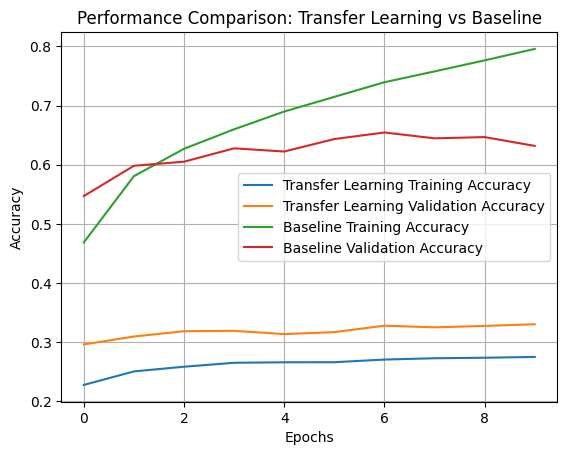

In [15]:
# Compare training and validation accuracy
plt.plot(history.history['accuracy'], label='Transfer Learning Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Transfer Learning Validation Accuracy')
plt.plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance Comparison: Transfer Learning vs Baseline')
plt.grid(True)  # Add grid for clarity
plt.show()

Transfer learning model:

- Observation: faster convergence and higher validation accuracy compared to the baseline model.

- Interpretation: transfer learning accelerates training and improves generalization, particularly with limited data.

Baseline model:

- Observation: slower convergence and lower overall accuracy.

- Interpretation: training a model from scratch requires significantly more data and time to achieve comparable results.

Validation vs. training accuracy:

- Observation: the transfer learning model shows a smaller gap between training and validation accuracy.

- Interpretation: this indicates reduced overfitting, as pretrained models have prior knowledge that helps them to generalize better.